Import Keras

In [1]:
#import keras
import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


Print the keras version number

In [2]:
#keras version
keras.__version__

'2.2.4'

Import fashion mnist dataset from keras

In [3]:
#import fashion_mnist
from keras.datasets import fashion_mnist

fashion_mnist = keras.datasets.fashion_mnist

Load the dataset

In [4]:
#fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(fashion_mnist)

<module 'keras.datasets.fashion_mnist' from '/Users/owner/opt/anaconda3/lib/python3.7/site-packages/keras/datasets/fashion_mnist.py'>


In [5]:
print('train: X=%s, y=%s' %(train_images.shape, train_labels.shape))

train: X=(60000, 28, 28), y=(60000,)


you can read more about fashion mnist dataset here 
https://github.com/zalandoresearch/fashion-mnist

Understand the dataset and answer the following 


*   Dimentions of the images in the dataset?
*   How many entries dose this dataset contains?
*   How the images are labled?
*   What is the range of the pixel values in train_images?
*   Plot the first image in the  "train_images" using matplotlib.pyplot








In [6]:
#dimentions of the images in the dataset?
# 60.000 images in the dataset, with each represented as 28x28 pixels
train_images.shape


(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
# how many entries dose this dataset contains?
# = 60,000 labels in the dataset
len(train_labels)

60000

In [9]:
len(test_labels)

10000

In [10]:
#how the images are labled? 
# = each label is between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
#what is the range of the pixel values in train_images? 
#= see that pixels values fall in range of 0 to 255 / 28x28
print (train_images.size)
print(train_images.shape)

47040000
(60000, 28, 28)


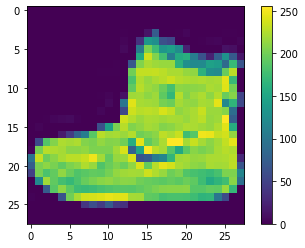

In [13]:
#plot the first image in the  "train_images" using matplotlib.pyplot
#= see that pixels values fall in range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()   #to show lateral bar
plt.grid(False)  #to dont show name on top
plt.show()  #dont really need

In [14]:
#why should we normalize the dataset?
#= we need to scale theses values to a range of 0 to 1 before feeding them to the neural network model.
#The goal of normalization is to change the values of numeric columns in the dataset to a common scale, 
#without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. 
#It is required only when features have different ranges.


You can read more about why we normalize the dataset here
https://www.jeremyjordan.me/batch-normalization/



```
import numpy as np
#To get the values between 0 to 1 instead of 0 to 255
train_images = np.expand_dims(train_images, axis=-1)  # (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, axis=-1) # (10000, 28, 28, 1)
#Please Normalize the train_images
train_images = ?
test_images = ?
#print(train_images[0])
plt.imshow(train_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()
```



In [15]:
#normalizing Train Images

# convert int to float
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

#normalize to range 0-1, by dividing by 255(max value), both need to be processed in the same way
train_images = train_images/255.0
test_images = test_images/255.0

# or:
#train_images = train_images.reshape((60000, 28 * 28))
#train_images = train_images.astype('float32')/255

#test_images = test_images.reshape((10000, 28 * 28))
#test_images = test_images.astype('float32')/255

#print(train_images[0])
#plt.imshow(train_images[0].reshape(28,28), cmap=plt.cm.binary)
#plt.show()

#label description
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

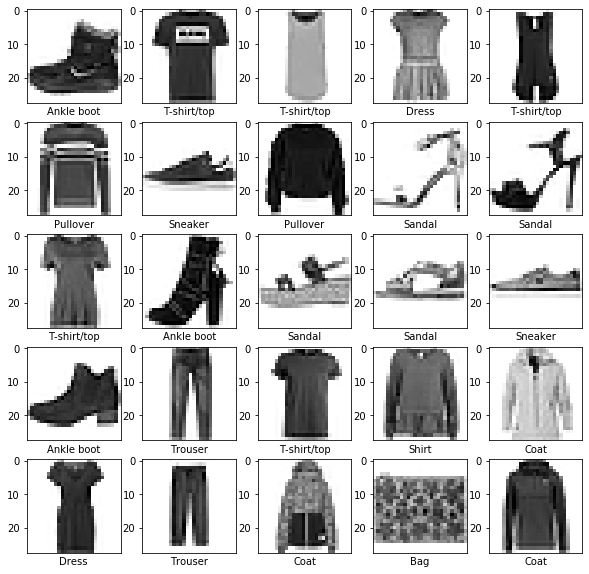

In [16]:
# verify if data is correct format, lets display the 25 first images below from training and display the class name below image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.xticks([])  
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [17]:
#To get the values between 0 to 1 instead of 0 to 255
train_images = np.expand_dims(train_images, axis=-1)  # (60000, 28, 28, 1)
test_images = np.expand_dims(test_images, axis=-1) # (10000, 28, 28, 1)



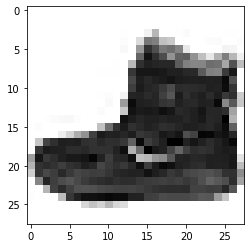

In [18]:
#print(train_images[0])
plt.imshow(train_images[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [19]:
#label description
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

In [20]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [21]:
train_labels = to_categorical(train_labels)
print(train_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [22]:
print(train_labels.shape)
#10 labels as 'one hot'

(60000, 10)


In [23]:
#### or acc doesnt work
test_labels = to_categorical(test_labels)
print(test_labels)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]




```
#Create a model that uses relu activation function for all layers except the last layer.
#Please enter appropriate numbers/words instead of the '?'
model = keras.Sequential([
   keras.layers.Conv2D(32, (3,3), padding='same', activation='?',
                           input_shape=(?, ?, 1)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='?', activation='?'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='?'),
    keras.layers.Dense(10,  activation='softmax')
])
```



In [30]:
import logging
logging.getLogger('tensorflow').disabled = True
print(tf.__version__)

1.15.0


In [31]:
#building the neural network
model = keras.Sequential([
   keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,  activation='softmax')
])


To make our network ready for training, we need to pick three more things, as part of "compilation" step:
*    **A loss function:** the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
*    **An optimizer:** this is the mechanism through which the network will update itself based on the data it sees and its loss function.
*    **Metrics** to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).



```
# choose appropriate values for the following fields
model.compile(optimizer="?",
              loss="?",
              metrics=["?"])
```








In [32]:
#model compilation
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


we are now ready to train our network
pick appropriate values for **epochs** and **batch_size**


```
model.fit(images, labels, epochs=? , batch_size=? )
```




In [47]:
#train the Network with train_images and train_labels
# 0.9601 = we have 96% accuracy on training data.
history = model.fit(train_images, train_labels, epochs=10 , batch_size=128, validation_data=(test_images, test_labels))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0969 - acc: 0.9647 - val_loss: 0.2458 - val_acc: 0.9235
Epoch 2/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0851 - acc: 0.9695 - val_loss: 0.2763 - val_acc: 0.9232
Epoch 3/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0750 - acc: 0.9728 - val_loss: 0.2802 - val_acc: 0.9236
Epoch 4/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0654 - acc: 0.9763 - val_loss: 0.3163 - val_acc: 0.9161
Epoch 5/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0572 - acc: 0.9791 - val_loss: 0.3415 - val_acc: 0.9222
Epoch 6/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0490 - acc: 0.9824 - val_loss: 0.3181 - val_acc: 0.9210
Epoch 7/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.0432 - acc: 0.9845 - val_loss: 0.3561 - val_acc

Check how the model performs on the test set using **evaluate** and print the **test accuracy**

In [48]:
#evaluate the test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 6s 568us/step


In [49]:
print('test acc:', test_acc)
# 91,9% accuracy on test, a bit lower than training. models tend to perform worse on new data than on training.(overfitting)

test acc: 0.9185


In [50]:
print('test loss:', test_loss)

test loss: 0.4032035242136102


In [51]:
#get the Prediction data for all the images
prediction = model.predict(test_images)
print(prediction)

[[7.78360154e-11 1.45936309e-19 2.94653364e-11 ... 1.63343884e-07
  8.41445389e-16 9.99999881e-01]
 [2.32950334e-12 3.35465575e-32 1.00000000e+00 ... 1.32064572e-25
  4.54145685e-24 2.09629171e-22]
 [1.58621075e-18 1.00000000e+00 6.15936323e-24 ... 3.44073238e-36
  3.67259248e-26 0.00000000e+00]
 ...
 [6.94093673e-27 0.00000000e+00 8.86353069e-24 ... 3.71805367e-26
  1.00000000e+00 3.58949727e-36]
 [3.43596467e-17 1.00000000e+00 5.68507276e-20 ... 9.31793947e-30
  3.51372914e-26 1.20639347e-27]
 [1.94950847e-08 3.40108280e-12 1.07593733e-04 ... 5.05094416e-03
  4.26317519e-03 1.18851675e-08]]


Remenber the model will give you the probability of the image for each label

In [52]:
#takes the highest value from the prediction
#array of 10 numbers, represent the model that image corresponds to each of the 10 dif articles of clothing
print((prediction[0]))

[7.7836015e-11 1.4593631e-19 2.9465336e-11 2.4913886e-18 8.4750644e-12
 5.4391465e-12 1.6944829e-12 1.6334388e-07 8.4144539e-16 9.9999988e-01]


So you have to pick the highest probability from it to get the actual prediction

In [53]:
print(np.argmax(prediction[0]))
#show which label has the highest confidence value

9


To print the corresponding label use **class_names**  

In [54]:
print(class_names[np.argmax(prediction[0])])

Ankle boot


**Bonus**:

  Show some of the test images along with Predicted and actual value

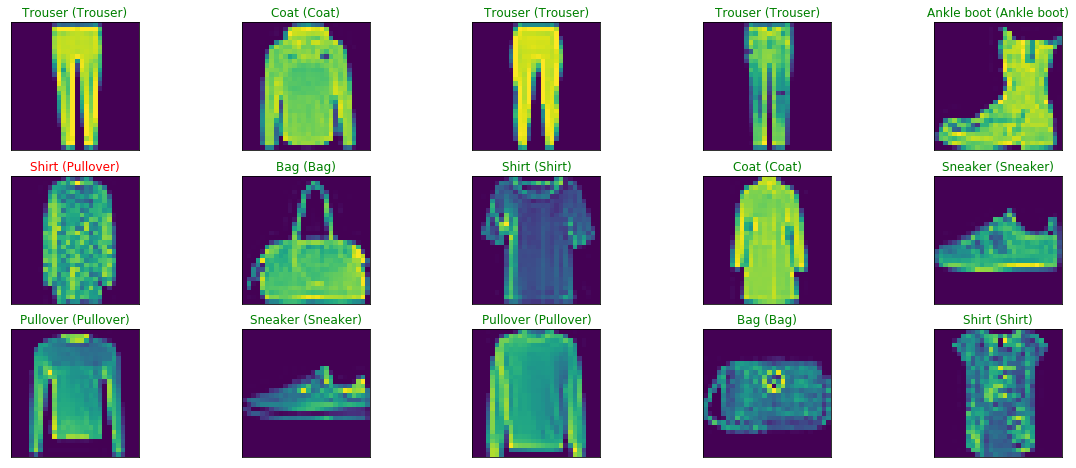

In [55]:

#let's visualize the prediction using the model you just trained, first we get the predictions with the model from the test data.
#Then we print out 15 images from the test data set, and set the titles with the prediction
#If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

y_hat = model.predict(test_images)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(test_labels[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

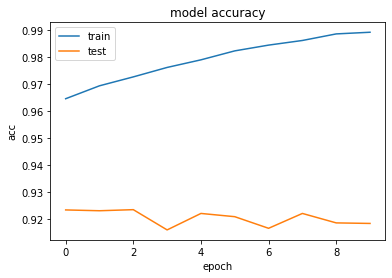

In [56]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

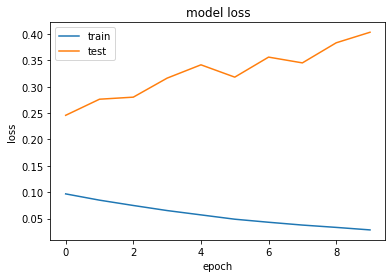

In [57]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:

#graph to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

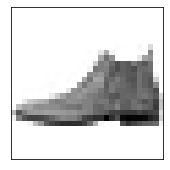

In [60]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

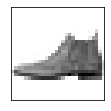

In [61]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction, test_labels)